In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix
import pandas as pd

# from sklearn.metrics import plot_confusion_matrix

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html


def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


""" Use restartkernel() to restart the kernel """

/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rcarrasco/anaconda3/envs/early/lib

' Use restartkernel() to restart the kernel '

## Old model, old training set

In [3]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_with_bogus.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

graph = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(graph=graph, config=config)
with graph.as_default():
    first_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
    checkpoint_path_best_so_far = os.path.join(
        PROJECT_PATH, "results/best_model_so_far_bck/checkpoints", "model"
    )
    first_model.load_model(checkpoint_path_best_so_far)


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f72080ca290>> 
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f72080ca290>> is not cached for key <code object call at 0x7f

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720d0341d0>> 
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720d0341d0>> is not cached for key <code object call at 0x7f7211659c00, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f811f690>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720d0341d0>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720d0341d0>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

Instructions for updating:
Use keras.layers.MaxPooling2D instead.
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>> 
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>> is not cached for key <code object call at 0x7f721167b0c0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/pooling.py", line 236> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f720c9ae4d0>, frozenset())
INFO:tensorflow:Converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>>
ERROR:tensorflow:Error converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c9

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720cb3d590>> 
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720cb3d590>> is not cached for key <code object call at 0x7f7211659c00, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f8169690>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720cb3d590>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f720cb3d590>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f728051ea10>> 
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f728051ea10>> is not cached for key <code object call at 0x7f7211659c00, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f815a610>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f728051ea10>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f728051ea10>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f71f8523e50>> 
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f71f8523e50>> is not cached for key <code object call at 0x7f7211659c00, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f8117390>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f71f8523e50>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f71f8523e50>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>> 
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>> is not cached for key <code object call at 0x7f721167b0c0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/pooling.py", line 236> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f8161950>, frozenset())
INFO:tensorflow:Converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>>
ERROR:tensorflow:Error converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f71f85a6c90>>
Traceback (most recent call last):
  File "/home/rcarrasco/ana

Instructions for updating:
Use keras.layers.flatten instead.
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f71f85a6c90>> 
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f71f85a6c90>> is not cached for key <code object call at 0x7f7211612ed0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 570> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f720c8060d0>, frozenset())
INFO:tensorflow:Converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f71f85a6c90>>
ERROR:tensorflow:Error converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f71f85a6c90>>
Traceback (most recent call last):
  File "

Instructions for updating:
Use keras.layers.dense instead.
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f7282eb02d0>> 
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f7282eb02d0>> is not cached for key <code object call at 0x7f7211615ed0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f80684d0>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f7282eb02d0>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f7282eb02d0>>
Traceback (most recent call last):
  File "/home/rcarrasco/an

Instructions for updating:
Use keras.layers.dropout instead.
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f71f81b9c90>> 
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Entity <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f71f81b9c90>> is not cached for key <code object call at 0x7f7210f7a030, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/layers/core.py", line 226> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f0746850>, frozenset({'__class__'}))
INFO:tensorflow:Converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f71f81b9c90>>
ERROR:tensorflow:Error converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f71f81b9c90>>
Traceback (most recent call

INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f8529310>> 
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f8529310>> is not cached for key <code object call at 0x7f7211615ed0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f8100a10>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f8529310>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f8529310>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/p

INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f7282eb02d0>> 
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Entity <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f7282eb02d0>> is not cached for key <code object call at 0x7f7210f7a030, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/layers/core.py", line 226> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f072d350>, frozenset({'__class__'}))
INFO:tensorflow:Converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f7282eb02d0>>
ERROR:tensorflow:Error converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f7282eb02d0>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/pyt

INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f85a6c90>> 
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f85a6c90>> is not cached for key <code object call at 0x7f7211615ed0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f71f079f090>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f85a6c90>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f71f85a6c90>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorfl

Instructions for updating:
Use `tf.cast` instead.






Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../results/best_model_so_far_bck/checkpoints/model


In [6]:
# load data
train_set, val_set, test_set = first_model._data_init()
# evaluate set
print("\nBEST SO FAR")
first_model.evaluate(test_set.data_array, test_set.data_label)

Label count AGN: 8866 -SN: 999 -VS: 9983 -asteroid: 9899 -bogus: 1980 -

BEST SO FAR

Test Metrics: loss 0.358586, accuracy 0.896000


{'accuracy': 0.896, 'loss': 0.35858554}

Normalized confusion matrix Acc 0.9327
[[0.9  0.02 0.08 0.   0.  ]
 [0.03 0.94 0.01 0.02 0.  ]
 [0.09 0.   0.9  0.   0.  ]
 [0.   0.02 0.   0.96 0.01]
 [0.   0.   0.02 0.   0.97]]


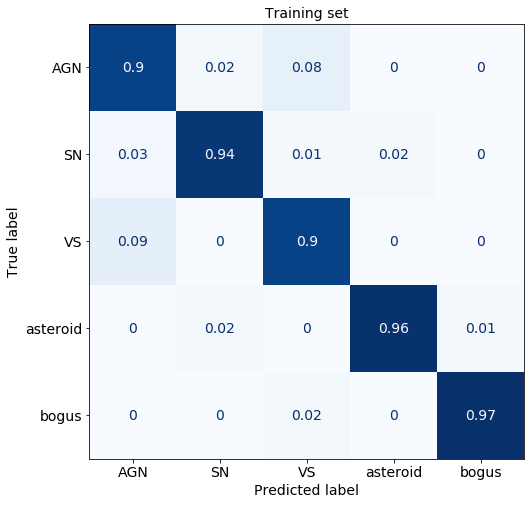

Normalized confusion matrix Acc 0.8960
[[0.88 0.   0.12 0.   0.  ]
 [0.08 0.84 0.02 0.06 0.  ]
 [0.14 0.02 0.84 0.   0.  ]
 [0.   0.02 0.   0.96 0.02]
 [0.   0.   0.02 0.02 0.96]]


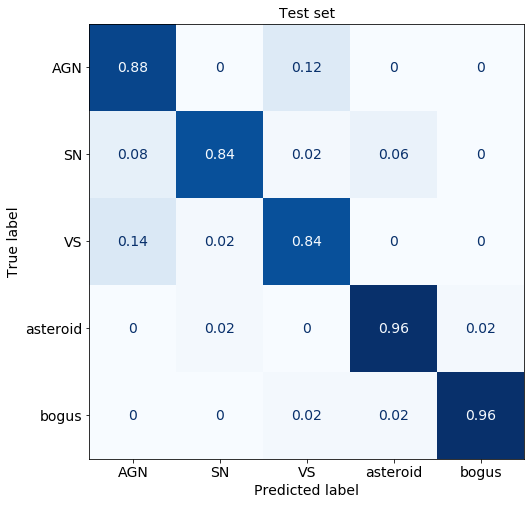

In [8]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    train_set.data_label,
    first_model.predict(train_set.data_array),
    title="Training set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/first_model_training_cm.pdf",
)
plt.show()
plot_confusion_matrix(
    test_set.data_label,
    first_model.predict(test_set.data_array),
    title="Test set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/first_model_test_cm.pdf",
)
plt.show()

## Old model, new training set

In [ ]:
restartkernel()

In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

# from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html


def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


""" Use restartkernel() to restart the kernel """

/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rcarrasco/anaconda3/envs/early/lib

' Use restartkernel() to restart the kernel '

In [2]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

graph = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(graph=graph, config=config)
with graph.as_default():
    first_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
    checkpoint_path_best_so_far = os.path.join(
        PROJECT_PATH, "results/best_model_so_far_bck/checkpoints", "model"
    )
    first_model.load_model(checkpoint_path_best_so_far)


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>> 
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>> is not cached for key <code object call at 0x7f

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b5e50>> 
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b5e50>> is not cached for key <code object call at 0x7fda9d7ecc90, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda7829ee10>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b5e50>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b5e50>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

Instructions for updating:
Use keras.layers.MaxPooling2D instead.
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>> 
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>> is not cached for key <code object call at 0x7fda9d80d150, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/pooling.py", line 236> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda9899bdd0>, frozenset())
INFO:tensorflow:Converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>>
ERROR:tensorflow:Error converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc1

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda9813d350>> 
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda9813d350>> is not cached for key <code object call at 0x7fda9d7ecc90, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda78213410>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda9813d350>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda9813d350>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>> 
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>> is not cached for key <code object call at 0x7fda9d7ecc90, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda782e98d0>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda786a6490>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b53d0>> 
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b53d0>> is not cached for key <code object call at 0x7fda9d7ecc90, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 195> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda78224fd0>, frozenset())
INFO:tensorflow:Converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b53d0>>
ERROR:tensorflow:Error converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fda784b53d0>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/ea

INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>> 
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>> is not cached for key <code object call at 0x7fda9d80d150, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/pooling.py", line 236> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda78283450>, frozenset())
INFO:tensorflow:Converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>>
ERROR:tensorflow:Error converting <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7fda7879fc10>>
Traceback (most recent call last):
  File "/home/rcarrasco/ana

Instructions for updating:
Use keras.layers.flatten instead.
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7fda7879fc10>> 
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7fda7879fc10>> is not cached for key <code object call at 0x7fda9d7a4f60, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 570> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda7827da10>, frozenset())
INFO:tensorflow:Converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7fda7879fc10>>
ERROR:tensorflow:Error converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7fda7879fc10>>
Traceback (most recent call last):
  File "

Instructions for updating:
Use keras.layers.dense instead.
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fdb0c6bee50>> 
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fdb0c6bee50>> is not cached for key <code object call at 0x7fda9d7a7f60, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda781e7b50>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fdb0c6bee50>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fdb0c6bee50>>
Traceback (most recent call last):
  File "/home/rcarrasco/an

Instructions for updating:
Use keras.layers.dropout instead.
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda78301810>> 
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Entity <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda78301810>> is not cached for key <code object call at 0x7fda9d18b0c0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/layers/core.py", line 226> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda78102c90>, frozenset({'__class__'}))
INFO:tensorflow:Converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda78301810>>
ERROR:tensorflow:Error converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda78301810>>
Traceback (most recent call

INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda78544fd0>> 
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda78544fd0>> is not cached for key <code object call at 0x7fda9d7a7f60, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda7819ce10>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda78544fd0>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda78544fd0>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/p

INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda786a6490>> 
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Entity <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda786a6490>> is not cached for key <code object call at 0x7fda9d18b0c0, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/layers/core.py", line 226> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda78283c90>, frozenset({'__class__'}))
INFO:tensorflow:Converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda786a6490>>
ERROR:tensorflow:Error converting <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7fda786a6490>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/pyt

INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda7879fc10>> 
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda7879fc10>> is not cached for key <code object call at 0x7fda9d7a7f60, file "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorflow/python/keras/layers/core.py", line 1031> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7fda780ecb10>, frozenset())
INFO:tensorflow:Converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda7879fc10>>
ERROR:tensorflow:Error converting <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7fda7879fc10>>
Traceback (most recent call last):
  File "/home/rcarrasco/anaconda3/envs/early/lib/python3.7/site-packages/tensorfl

Instructions for updating:
Use `tf.cast` instead.






Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../results/best_model_so_far_bck/checkpoints/model


In [4]:
# load data
train_set, val_set, test_set = first_model._data_init()
# evaluate set
print("\nBEST SO FAR")
first_model.evaluate(test_set.data_array, test_set.data_label)

  0%|          | 27/36262 [00:00<02:14, 269.36it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 36262/36262 [01:14<00:00, 488.31it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0

BEST SO FAR

Test Metrics: loss 1.369669, accuracy 0.768000


{'accuracy': 0.768, 'loss': 1.3696692}

Normalized confusion matrix Acc 0.7752
[[0.82 0.08 0.1  0.   0.  ]
 [0.03 0.86 0.01 0.1  0.  ]
 [0.11 0.01 0.87 0.   0.  ]
 [0.   0.02 0.   0.96 0.01]
 [0.   0.62 0.01 0.01 0.36]]


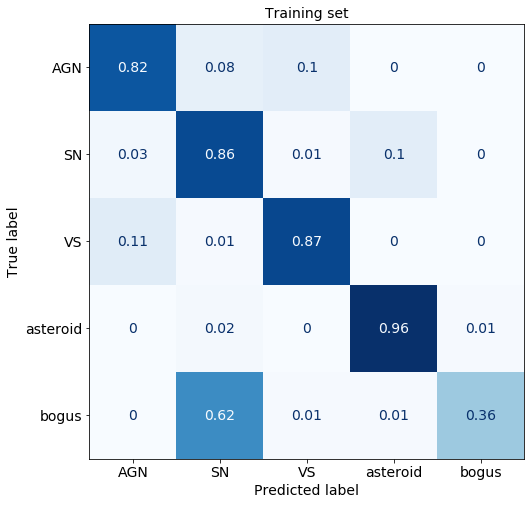

Normalized confusion matrix Acc 0.7680
[[0.8  0.02 0.18 0.   0.  ]
 [0.02 0.86 0.   0.1  0.02]
 [0.18 0.   0.82 0.   0.  ]
 [0.   0.02 0.   0.96 0.02]
 [0.   0.58 0.02 0.   0.4 ]]


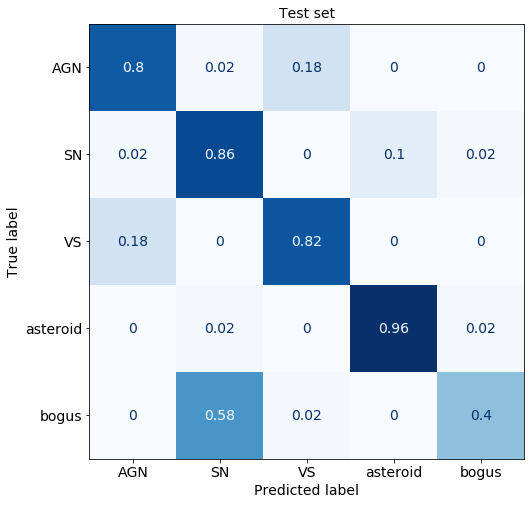

In [6]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    train_set.data_label,
    first_model.predict(train_set.data_array),
    title="Training set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/first_model_with_extra_bogus_tr.pdf",
)
plt.show()
plot_confusion_matrix(
    test_set.data_label,
    first_model.predict(test_set.data_array),
    title="Test set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/first_model_with_extra_bogus_test.pdf",
)
plt.show()

## New model, new training set

In [ ]:
restartkernel()

In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

# from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
import pickle

from modules.data_loaders.frame_to_input import FrameToInput
from parameters import param_keys
from modules.data_loaders.ztf_stamps_loader import ZTFLoader

from IPython.display import display_html


def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


""" Use restartkernel() to restart the kernel """

' Use restartkernel() to restart the kernel '

In [2]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}
graph = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(graph=graph, config=config)
with graph.as_default():
    new_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
    checkpoint_path_best_so_far = os.path.join(
        PROJECT_PATH, "results/best_model_new_bogus/checkpoints", "model"
    )
    new_model.load_model(checkpoint_path_best_so_far)

params_entropy = params_best_so_far.copy()
params_entropy.update({param_keys.ENTROPY_REG_BETA: 0.5})

graph2 = tf.Graph()
sess2 = tf.Session(graph=graph2)

with graph2.as_default():
    model_entropy = DeepHiTSEntropyRegModel(params_entropy, session=sess2)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH,
        # "results/best_model_so_far/checkpoints", 'model')
        "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints",
        "model",
    )
    model_entropy.load_model(checkpoint_path_entropy)


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f05a2489b00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f05a2489b00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f05a2489b00>: default rule
INFO:tensorflow:Entity <function augment_with_rotations at 0x7f05a2489b00> is not cached for key <code object augment_with_rotations at 0x7f05a2489a50, file "../modules/iterators/iterator_post_processing.py", line 46> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f0598153250>, frozenset())
INFO:tensorflow:Converting <function augment_with_rotations at 0x7f05a2489b00>
INFO:tensorflow:Compiled output of <function augment_with_rotations at 0x7f05a2489b00>:

# coding=utf-8
def tf__augment_with_rotations(img_batch, labels):
  do

Instructions for updating:
Use keras.layers.MaxPooling2D instead.
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0598020510>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0598020510>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f059b468490>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f059b468490>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0

INFO:tensorflow:Converted call: <function concat at 0x7f05a8384830>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f05a2489b00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f05a2489b00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f05a2489b00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f058425d290> : None
INFO:tensorflow:KW de

In [3]:
# load data
train_set, val_set, test_set = new_model._data_init()
# evaluate set
print("\nBEST SO FAR")
new_model.evaluate(test_set.data_array, test_set.data_label)

  0%|          | 36/36262 [00:00<01:40, 358.68it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 36262/36262 [01:22<00:00, 440.50it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0

BEST SO FAR

Test Metrics: loss 0.347705, accuracy 0.880000


{'accuracy': 0.88, 'loss': 0.34770483}

In [4]:
pickle.dump(
    {"images": test_set.data_array, "labels": test_set.data_label},
    open("plots/test_images.pkl", "wb"),
    protocol=2,
)

## Regular model results

Normalized confusion matrix Acc 0.9122
[[0.89 0.03 0.08 0.   0.  ]
 [0.02 0.95 0.01 0.02 0.  ]
 [0.12 0.01 0.87 0.   0.  ]
 [0.   0.04 0.   0.95 0.  ]
 [0.01 0.06 0.02 0.01 0.9 ]]


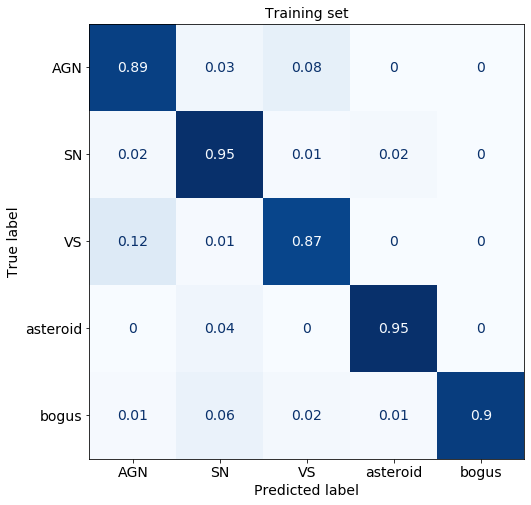

Normalized confusion matrix Acc 0.8800
[[0.88 0.   0.12 0.   0.  ]
 [0.   0.82 0.   0.16 0.02]
 [0.14 0.   0.86 0.   0.  ]
 [0.   0.04 0.   0.96 0.  ]
 [0.   0.08 0.02 0.02 0.88]]


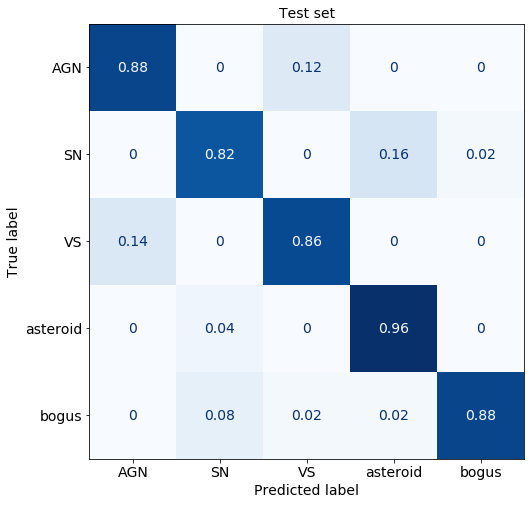

In [5]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    train_set.data_label,
    new_model.predict(train_set.data_array),
    title="Training set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/final_regular_model_tr.pdf",
)
plt.show()
plot_confusion_matrix(
    test_set.data_label,
    new_model.predict(test_set.data_array),
    title="Test set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/final_regular_model_test.pdf",
)
plt.show()

## Regularized model

Normalized confusion matrix Acc 0.9410
[[0.9  0.02 0.07 0.   0.01]
 [0.01 0.98 0.   0.01 0.  ]
 [0.11 0.   0.88 0.   0.  ]
 [0.   0.01 0.   0.98 0.  ]
 [0.   0.02 0.01 0.01 0.96]]


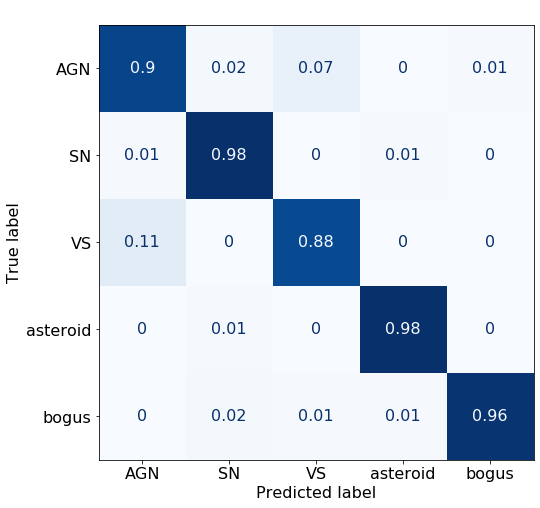

Normalized confusion matrix Acc 0.9000
[[0.88 0.   0.12 0.   0.  ]
 [0.   0.84 0.   0.12 0.04]
 [0.12 0.   0.88 0.   0.  ]
 [0.   0.   0.   0.98 0.02]
 [0.   0.06 0.02 0.   0.92]]


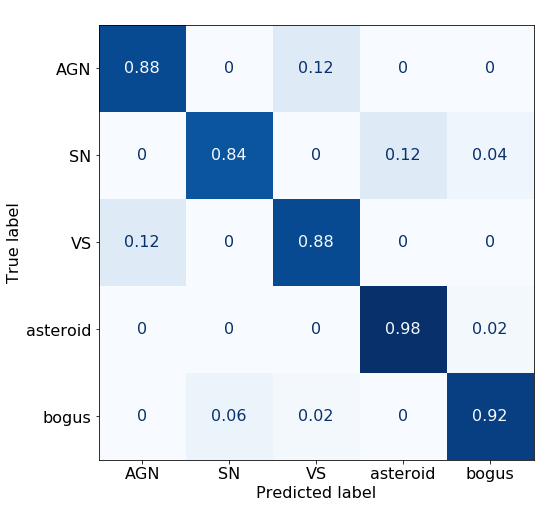

(250, 21, 21, 3)


In [6]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    train_set.data_label,
    model_entropy.predict(train_set.data_array),
    title=" ",
    classes=class_names,
    normalize=True,
    label_fontsize=16,
    axis_fontsize=16,
    colorbar=False,
    savepath="plots/final_regularized_model_tf.pdf",
)
plt.show()
plot_confusion_matrix(
    test_set.data_label,
    model_entropy.predict(test_set.data_array),
    title=" ",
    classes=class_names,
    normalize=True,
    label_fontsize=16,
    axis_fontsize=16,
    colorbar=False,
    savepath="plots/final_regularized_model_test.pdf",
)
plt.show()
print(test_set.data_array.shape)

## TNS confirmed supernovae recall

In [7]:
params_entropy = params_best_so_far.copy()
params_entropy.update({param_keys.ENTROPY_REG_BETA: 0.5})
params_entropy.update(
    {param_keys.DATA_PATH_TRAIN: "../../pickles/tns_confirmed_sn.pkl"}
)

graph2 = tf.Graph()
sess2 = tf.Session(graph=graph2)

with graph2.as_default():
    model_entropy = DeepHiTSEntropyRegModel(params_entropy, session=sess2)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH,
        # "results/best_model_so_far/checkpoints", 'model')
        "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints",
        "model",
    )
    model_entropy.load_model(checkpoint_path_entropy)

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f05a2489b00>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f05a2489b00>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f05a2489b00>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f05781675f0> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f05781675f0> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f05781675f0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f05403b3910>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f054014fd10>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f054014fd10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints/model


In [8]:
data_dict = model_entropy.data_loader._get_data(new_model.data_loader.path)
dataset = model_entropy.data_loader._get_preprocessed_dataset(data_dict)

 19%|█▉        | 47/249 [00:00<00:00, 467.02it/s]

{'SN': 0}


100%|██████████| 249/249 [00:00<00:00, 459.97it/s]



2 misshaped samples removed

18 samples with NaNs. NaNs replaced with number 0


In [9]:
original_df = pd.read_pickle("../../pickles/tns_confirmed_sn.pkl")
ztf_ids = original_df["oid"].values
original_df

,class,oid,cutoutScience,cutoutTemplate,cutoutDifference,sgscore1,distpsnr1,sgscore2,distpsnr2,sgscore3,distpsnr3,isdiffpos
0,SN,ZTF19acxldra,b'\x1f\x8b\x08\x00\xfc/\xea]\x02\x03\xed\xbao\...,b'\x1f\x8b\x08\x00\xfc/\xea]\x02\x03\xed\xbbe\...,b'\x1f\x8b\x08\x00\xfc/\xea]\x02\x03\xed\xb7iX...,0.000000,19.800104,0.026750,20.014732,0.500000,20.705873,t
1,SN,ZTF19acxlylb,b'\x1f\x8b\x08\x001K\xea]\x02\x03\xed\x9bg\x94...,b'\x1f\x8b\x08\x001K\xea]\x02\x03\xed\x9bUtT\x...,b'\x1f\x8b\x08\x001K\xea]\x02\x03\xed\xb7i4\x1...,0.087238,0.816878,0.500000,1.778374,0.500000,1.812506,t
2,SN,ZTF19acxlddi,b'\x1f\x8b\x08\x00\x82/\xea]\x02\x03\xed\xbaoT...,b'\x1f\x8b\x08\x00\x82/\xea]\x02\x03\xed\xbbU\...,b'\x1f\x8b\x08\x00\x82/\xea]\x02\x03\xed\xb7w8...,0.102929,1.112586,0.500000,4.591066,0.500000,7.920507,t
3,SN,ZTF19aculczm,b'\x1f\x8b\x08\x00\xb9\x03\xda]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xb9\x03\xda]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xb9\x03\xda]\x02\x03\xed\xb...,0.000833,0.609334,0.667952,9.057698,0.001250,15.149215,t
4,SN,ZTF19acanzwg,b'\x1f\x8b\x08\x00\xa3\t\x93]\x02\x03\xed\xbbU...,b'\x1f\x8b\x08\x00\xa3\t\x93]\x02\x03\xed\x9be...,b'\x1f\x8b\x08\x00\xa3\t\x93]\x02\x03\xed\xb7i...,0.926283,16.350044,0.019375,20.454100,0.500000,20.946939,t
...,...,...,...,...,...,...,...,...,...,...,...,...
244,SN,ZTF19abzkexb,b'\x1f\x8b\x08\x00?\xf0\x81]\x02\x03\xed\xbamX...,b'\x1f\x8b\x08\x00?\xf0\x81]\x02\x03\xed\xbbet...,b'\x1f\x8b\x08\x00?\xf0\x81]\x02\x03\xed\xb9i4...,0.500000,0.724298,0.034167,3.382434,0.981917,4.452346,t
245,SN,ZTF19abzhzet,b'\x1f\x8b\x08\x00\xb2\xa0\x81]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xb2\xa0\x81]\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xb2\xa0\x81]\x02\x03\xed\xb...,0.952417,12.319182,0.006488,17.755135,0.170940,18.123569,t
246,SN,ZTF19abzfmak,b'\x1f\x8b\x08\x00rU\x80]\x02\x03\xed\xbbUT\x9...,b'\x1f\x8b\x08\x00sU\x80]\x02\x03\xed\xbbep\x1...,b'\x1f\x8b\x08\x00rU\x80]\x02\x03\xed\xb7Y4\x9...,0.015917,4.479890,0.277458,4.983243,0.980667,8.449877,t
247,SN,ZTF19abyzuos,b'\x1f\x8b\x08\x00\xd4\x19~]\x02\x03\xed\xbb\x...,b'\x1f\x8b\x08\x00\xd4\x19~]\x02\x03\xed\xbaUt...,b'\x1f\x8b\x08\x00\xd4\x19~]\x02\x03\xed\xb7YX...,0.500000,2.805644,0.190970,3.239499,0.500000,3.302484,t


In [10]:
tns_pred = model_entropy.predict(dataset.data_array)
probs = model_entropy.predict_proba(dataset.data_array)
recall = np.sum(tns_pred == 1) / len(tns_pred)
print(tns_pred)
print(
    "######## RECALL OF ENTROPY MODEL ON TNS SUPERNOVAE THAT ARE NOT IN THE TRAINING SET ########"
)
print(recall)
print("########")
print(probs.shape)

[3 1 1 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 0 1 1 1 1 1 3 1 1
 1 1 1 1 1 3 3 0 1 3 1 1 1 1 4 1 1 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1 1 4
 1 1 3 1 0 1 1 3 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 3 1 1 1 1 1 1 1 0 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 3 0 1 1 1 1 1 1 3 1 1 4 3 3 1 1 1 1 4 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 4 4 3 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1]
######## RECALL OF ENTROPY MODEL ON TNS SUPERNOVAE THAT ARE NOT IN THE TRAINING SET ########
0.8137651821862348
########
(247, 5)


In [11]:
recall = np.sum(tns_pred == 4) / len(tns_pred)
print(recall)

0.05668016194331984


[0.05898762 0.03548369 0.06412327 0.79917854 0.04222686]
ZTF19acxldra


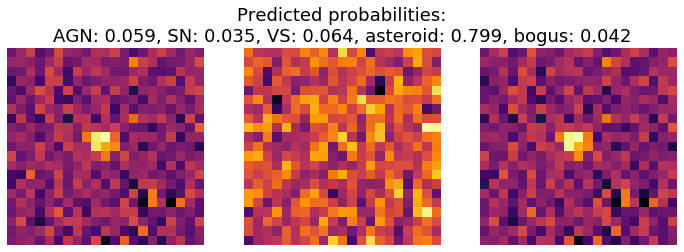

[0.05110787 0.7359034  0.05119296 0.03583431 0.1259615 ]
ZTF19acxlylb


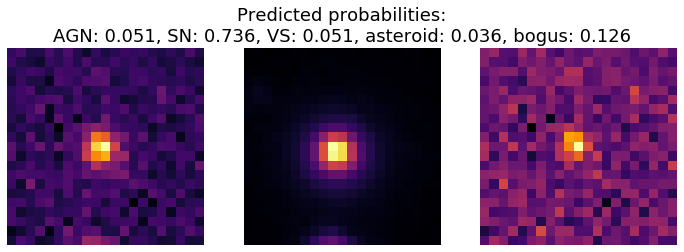

[0.04081732 0.87573546 0.03352881 0.02346929 0.02644911]
ZTF19acxlddi


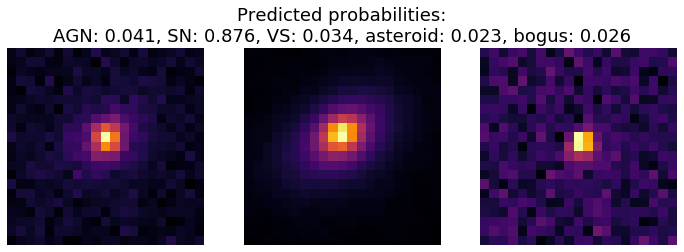

[0.03089163 0.8145027  0.03015346 0.02936865 0.0950836 ]
ZTF19aculczm


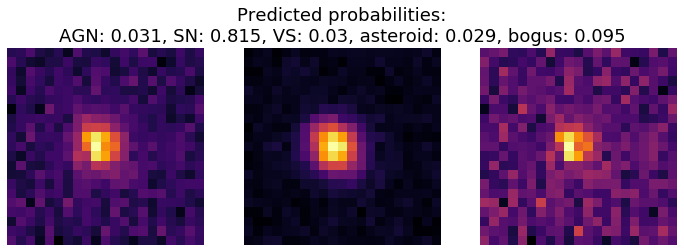

[0.08209988 0.13709894 0.07517166 0.6524612  0.05316837]
ZTF19acanzwg


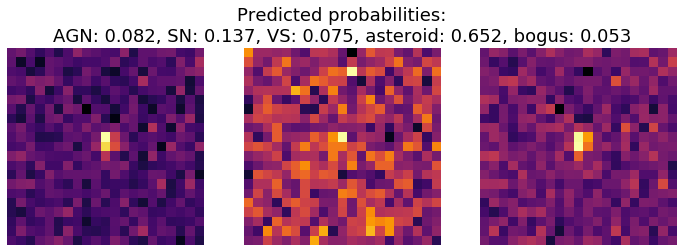

[0.01769452 0.9249014  0.01554227 0.01496437 0.02689734]
ZTF19acvijnj


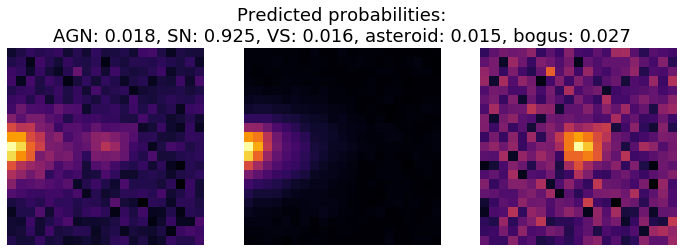

[0.04076741 0.81497335 0.04501547 0.03245962 0.06678423]
ZTF19acvgbqr


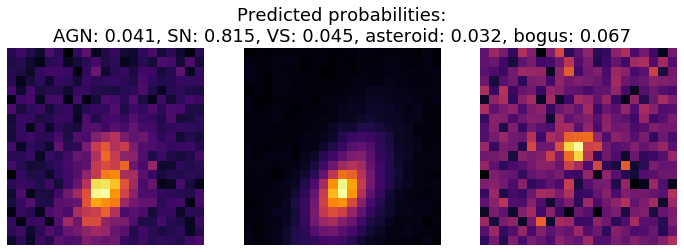

[0.0599232  0.05904228 0.06388721 0.7568153  0.06033194]
ZTF19aculgvn


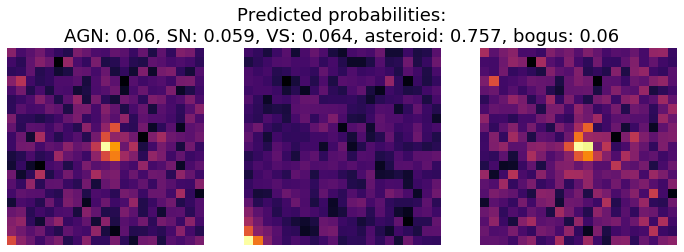

[0.3873176  0.39031166 0.08019179 0.0776274  0.06455156]
ZTF19acthgxq


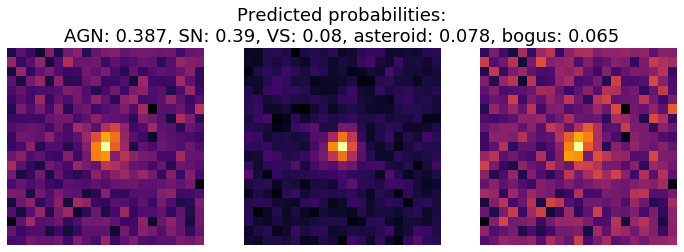

[0.06733127 0.0555293  0.06917703 0.74729013 0.06067222]
ZTF19aculypc


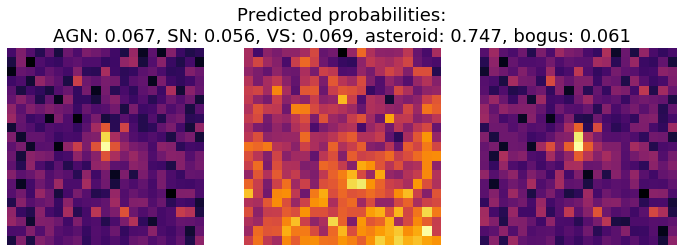

[0.06754448 0.17205167 0.07138816 0.58598137 0.1030344 ]
ZTF19acvgbeh


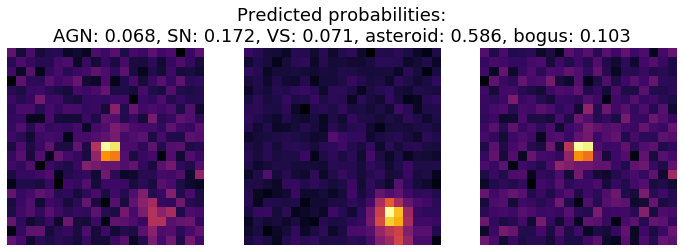

[0.03246493 0.8062705  0.03753639 0.03852293 0.08520526]
ZTF19acukucu


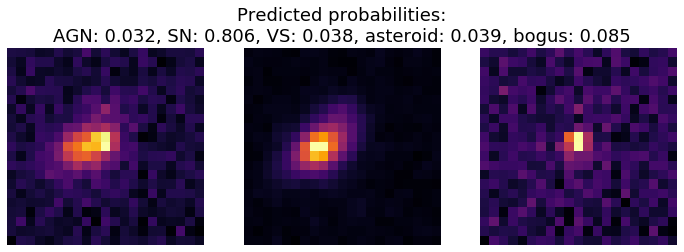

[0.02978498 0.88463145 0.02586452 0.04165932 0.01805968]
ZTF19acthucv


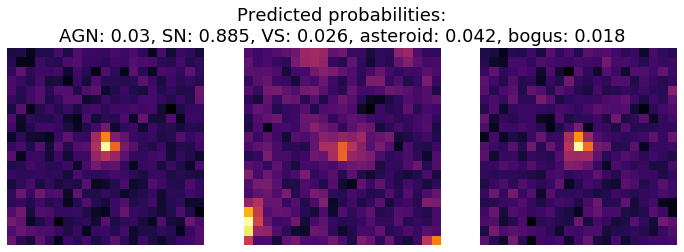

[0.04984966 0.70263696 0.03563705 0.16403154 0.0478448 ]
ZTF19acngsnc


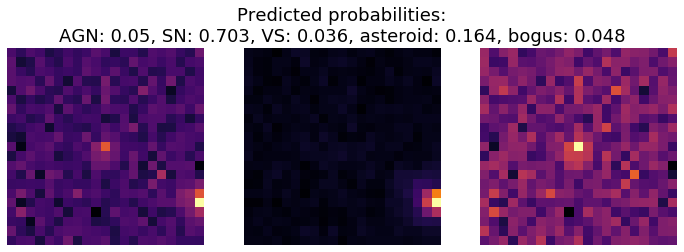

[0.01475477 0.9204324  0.01518185 0.01427197 0.03535903]
ZTF19acszmgx


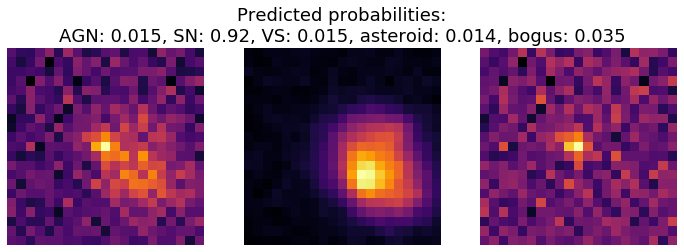

[0.0613901  0.7491884  0.05150421 0.09393886 0.0439785 ]
ZTF19actzjrf


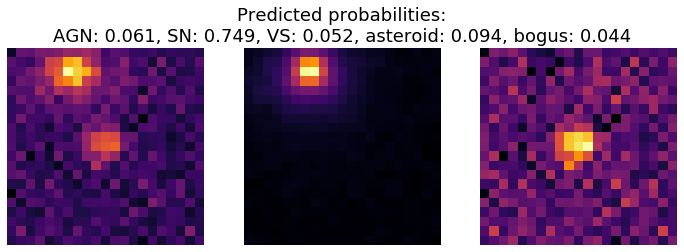

[0.04436816 0.7767158  0.05007238 0.06853472 0.06030889]
ZTF19actnwlw


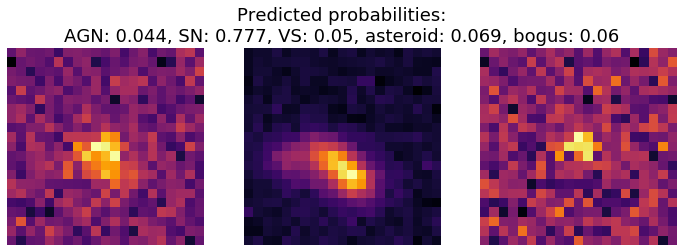

[0.02636438 0.87796444 0.02650025 0.00590854 0.06326243]
ZTF19actldas


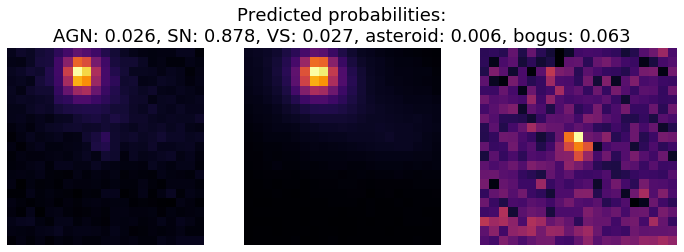

[0.10108961 0.11906269 0.09527799 0.19670297 0.48786673]
ZTF19acsvqrx


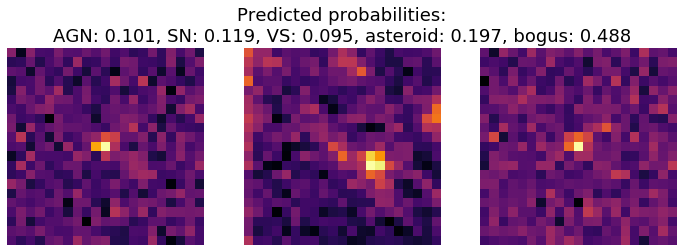

[0.03753879 0.63864446 0.05403008 0.21723136 0.05255527]
ZTF19actfqhp


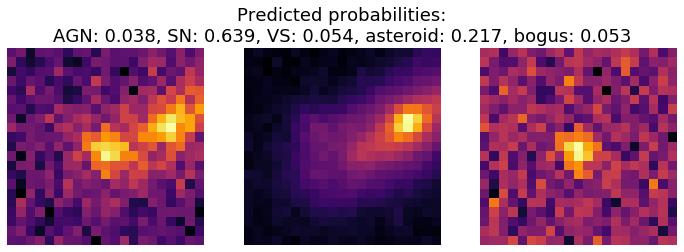

[0.00885719 0.8245965  0.01488767 0.01053316 0.14112549]
ZTF19actaiag


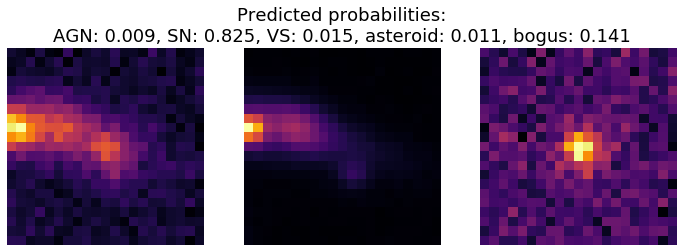

[0.0348361  0.8163664  0.03157512 0.05504841 0.06217392]
ZTF19acshkft


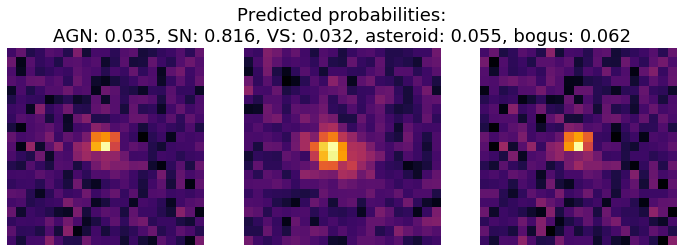

[0.13356295 0.6216413  0.061246   0.03825995 0.14528988]
ZTF19acrenwk


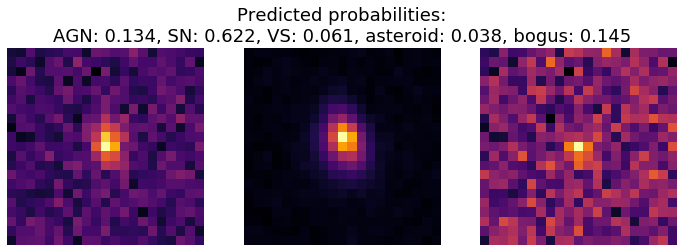

[0.10664776 0.71087223 0.03284083 0.05806852 0.09157065]
ZTF19acspfcb


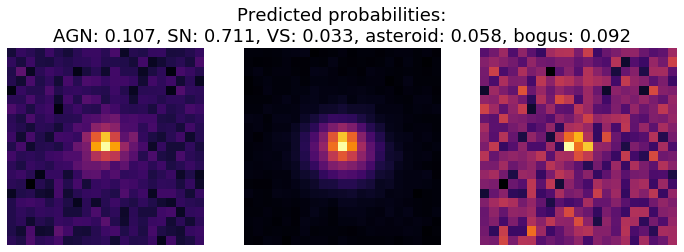

[0.05595747 0.59467804 0.09476534 0.08354994 0.17104924]
ZTF19acoyxuv


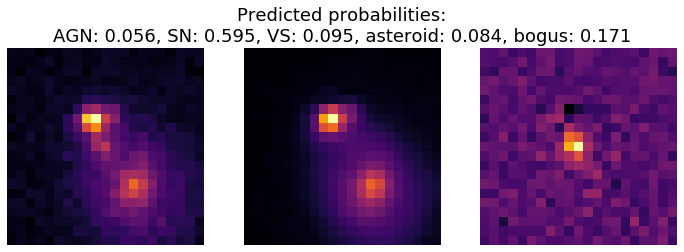

[0.02886115 0.8877886  0.0338974  0.0316818  0.01777101]
ZTF19ackjvtl


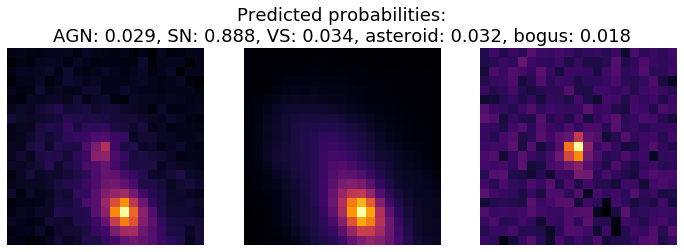

[0.03409655 0.7928284  0.05312827 0.03389664 0.0860501 ]
ZTF19acmxymo


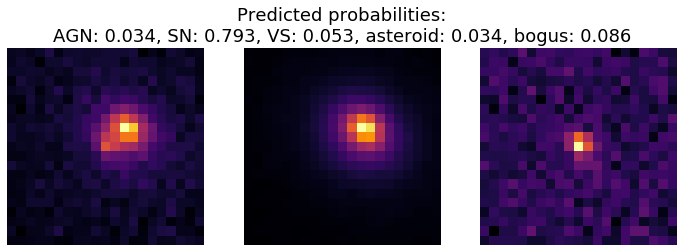

[0.07220383 0.22536515 0.0667363  0.06016646 0.5755282 ]
ZTF19acryurj


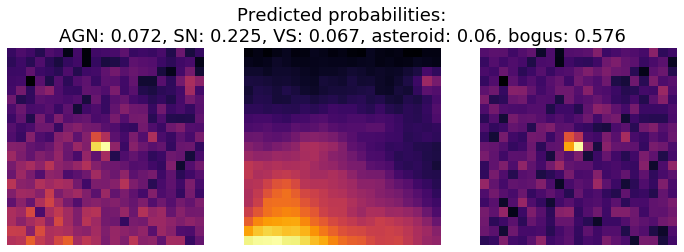

[0.5526655  0.21243764 0.03302754 0.07339866 0.12847072]
ZTF19acryaon


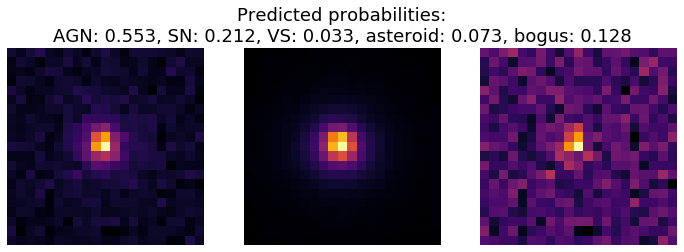

[0.03029098 0.78653663 0.02780225 0.02252019 0.13285002]
ZTF19acruqph


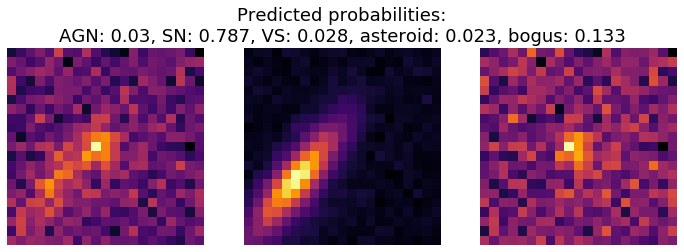

In [12]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
images = dataset.data_array
skip_ids = [193, 195]

id_counter = 0
for i in range(30):
    if id_counter in skip_ids:
        continue
    f, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(images[i][..., 0], cmap="inferno")
    ax[1].imshow(images[i][..., 1], cmap="inferno")
    ax[2].imshow(images[i][..., 2], cmap="inferno")
    ax[1].set_title("Predicted class " + class_names[tns_pred[i]])
    ax[0].axis("off")
    ax[1].axis("off")
    ax[2].axis("off")
    prob_str = "Predicted probabilities:\n"
    for c, p in enumerate(probs[i, :]):
        prob_str += class_names[c] + ": " + str(np.round(p, 3)) + ", "
    ax[1].set_title(prob_str[:-2], fontsize=18)
    plt.savefig("plots/tns_supernovae/sample_" + str(i) + ".pdf", bbox_inches="tight")
    print(probs[i, :])
    print(ztf_ids[id_counter])
    plt.show()
    id_counter += 1

In [13]:
import fastavro
import glob


def collect_avros(avros_path):
    avro_list = []
    files = [f for f in glob.glob(avros_path + "*.avro", recursive=False)]
    for i, p in enumerate(files):
        avro_data = read_avro(p)
        if avro_data is None:
            continue
        avro_list.append(avro_data)
    return avro_list


def read_avro(avro_path):
    # print(avro_path)
    with open(avro_path, "rb") as f:
        freader = fastavro.reader(f)
        schema = freader.schema
        packet_read = False
        for i, packet in enumerate(freader):
            packet_read = True
            continue
        if not packet_read:
            return None
    return packet

In [14]:
avros_tns = collect_avros(
    "/home/rodrigo/Projects/stamp_classifier/pickles/confirmed_sn/avros/"
)
# avros_sn_training = collect_avros("")
all_avros = avros_tns

In [17]:
fwhm = []
bogus_prob = []
skip_ids = [193, 195]

for i, avro_sample in enumerate(all_avros):
    if id_counter in skip_ids:
        continue
    bogus_prob.append(probs[i, 4])
    fwhm.append(avro_sample["candidate"]["fwhm"])
    id_counter += 1

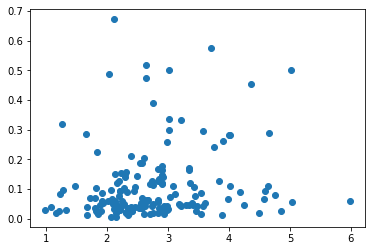

In [19]:
plt.plot(fwhm, bogus_prob, "o")
plt.show()

## Confidence for different betas (new dataset)

In [1]:
restartkernel()

NameError: name 'restartkernel' is not defined

In [1]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

# from sklearn.metrics import plot_confusion_matrix

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html


def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


""" Use restartkernel() to restart the kernel """

' Use restartkernel() to restart the kernel '

In [2]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

"""Bests models per beta
DeepHitsEntropyRegBeta0.1000_2_20191202-145831 0.884
DeepHitsEntropyRegBeta0.5000_1_20191202-165430 0.9

"""

graph = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(graph=graph, config=config)
with graph.as_default():
    regular_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
    checkpoint_path_best_so_far = os.path.join(
        PROJECT_PATH, "results/best_model_new_bogus/checkpoints", "model"
    )
    regular_model.load_model(checkpoint_path_best_so_far)

params_entropy_01 = params_best_so_far.copy()
params_entropy_01.update({param_keys.ENTROPY_REG_BETA: 0.1})

graph2 = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess2 = tf.Session(graph=graph2, config=config)
with graph2.as_default():
    model_entropy_01 = DeepHiTSEntropyRegModel(params_entropy_01, session=sess2)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH,
        "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.1000_2_20191202-145831/checkpoints",
        "model",
    )
    model_entropy_01.load_model(checkpoint_path_entropy)

params_entropy_05 = params_best_so_far.copy()
params_entropy_05.update({param_keys.ENTROPY_REG_BETA: 0.5})

graph3 = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess3 = tf.Session(graph=graph3, config=config)
with graph3.as_default():
    model_entropy_05 = DeepHiTSEntropyRegModel(params_entropy_05, session=sess3)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH,
        "results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints",
        "model",
    )
    model_entropy_05.load_model(checkpoint_path_entropy)

params_entropy_1 = params_best_so_far.copy()
params_entropy_1.update({param_keys.ENTROPY_REG_BETA: 1.0})

graph4 = tf.Graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess4 = tf.Session(graph=graph4, config=config)
with graph4.as_default():
    model_entropy_1 = DeepHiTSEntropyRegModel(params_entropy_1, session=sess4)
    checkpoint_path_entropy = os.path.join(
        PROJECT_PATH, "results/best_model_new_bogus_reg/checkpoints", "model"
    )
    model_entropy_1.load_model(checkpoint_path_entropy)


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0caf1b19e0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Entity <function augment_with_rotations at 0x7f0caf1b19e0> is not cached for key <code object augment_with_rotations at 0x7f0caf1b1930, file "../modules/iterators/iterator_post_processing.py", line 46> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f0ca4112510>, frozenset())
INFO:tensorflow:Converting <function augment_with_rotations at 0x7f0caf1b19e0>
INFO:tensorflow:Compiled output of <function augment_with_rotations at 0x7f0caf1b19e0>:

# coding=utf-8
def tf__augment_with_rotations(img_batch, labels):
  do

Instructions for updating:
Use keras.layers.MaxPooling2D instead.
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0c8c334690>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0c8c334690>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ca40d4e90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ca40d4e90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0

INFO:tensorflow:Converted call: <function concat at 0x7f0cb4a595f0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0caf1b19e0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0c606c3170> : None
INFO:tensorflow:KW de

INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0c604ceb00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f0cb3831680>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f0cb3831680>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f0cb3831680>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f0cb4a595f0>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:

INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_1_20191202-165430/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0caf1b19e0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0caf1b19e0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0c60055200> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0c60055200> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_convert

INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0c4843e110>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0c4843e110>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0c60057a10>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0c60057a10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/best_model_new_bogus_reg/checkpoints/model


In [3]:
# models = [regular_model, model_entropy_01, model_entropy_05, model_entropy_1]
# model_name = ["beta 0", "beta 0.1", "beta 0.5", "beta 1.0"]
models = [regular_model, model_entropy_05, model_entropy_1]
model_name = ["beta 0", "beta 0.5", "beta 1.0"]

train_set, val_set, test_set = regular_model._data_init()

  0%|          | 21/36262 [00:00<02:59, 201.40it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 36262/36262 [01:47<00:00, 337.39it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0


In [4]:
print(test_set.data_array.shape)
print(test_set.data_label.shape)
print(np.unique(test_set.data_label))
name_label = {"AGN": 0, "SN": 1, "VS": 2, "asteroid": 3, "bogus": 4}
label_name = {y: x for x, y in name_label.items()}
label_name

(250, 21, 21, 3)
(250,)
[0 1 2 3 4]


{0: 'AGN', 1: 'SN', 2: 'VS', 3: 'asteroid', 4: 'bogus'}

In [5]:
def plot_confidence(
    labels, model_prob, label_name, experiment="model", bins=10, fontsize=14
):
    classes = np.unique(labels)
    f, ax = plt.subplots(
        1,
        len(classes),
        figsize=(20, 4),
        sharex=True,
        sharey=True,
        gridspec_kw={"hspace": 0, "wspace": 0},
    )
    for super_c in classes:
        for c in classes:
            class_index = np.where(labels == super_c)[0]
            probs_class_c = model_prob[class_index, c]
            ax[super_c].hist(
                probs_class_c, bins=bins, label=label_name[c], alpha=0.5, density=True
            )
        ax[super_c].set_title(label_name[super_c], fontsize=fontsize)
        ax[super_c].set_xlim([0, 1])
        ax[super_c].set_ylim([0, 30])
        ax[super_c].set_xlabel("class probability", fontsize=fontsize)
    ax[0].set_ylabel(experiment, fontsize=fontsize)
    ax[len(classes) - 1].legend()
    plt.show()

## Test set

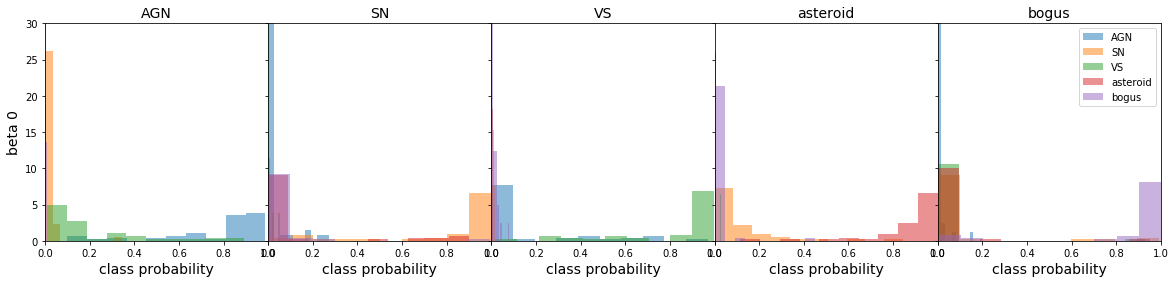

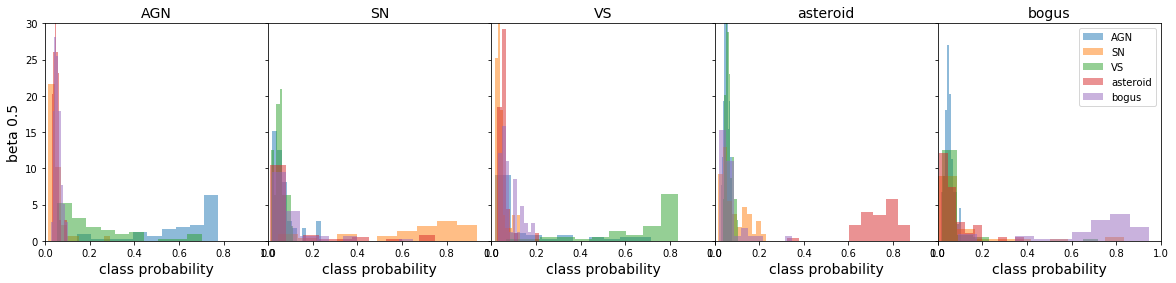

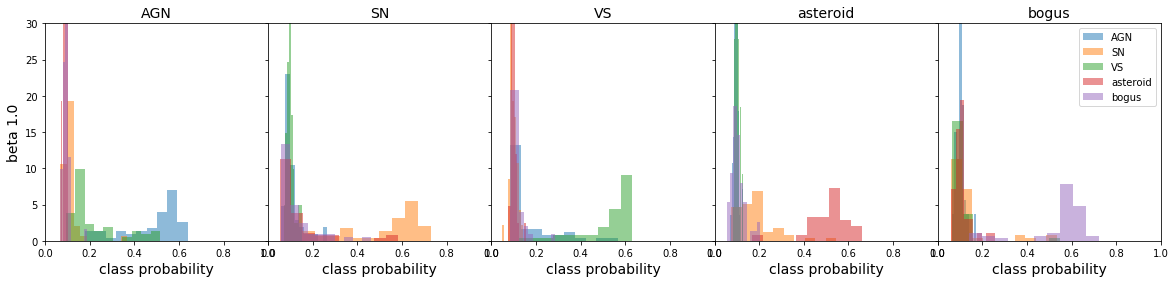

In [6]:
for i, m in enumerate(models):
    model_pred = m.predict_proba(test_set.data_array)
    plot_confidence(
        test_set.data_label, model_pred, label_name, experiment=model_name[i]
    )

## Training set

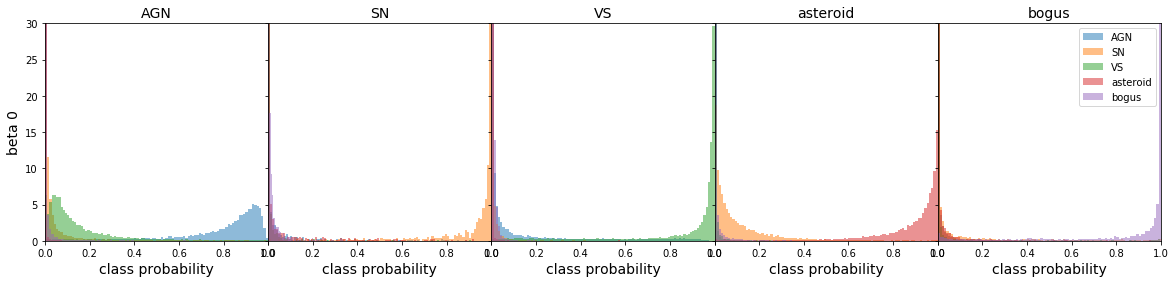

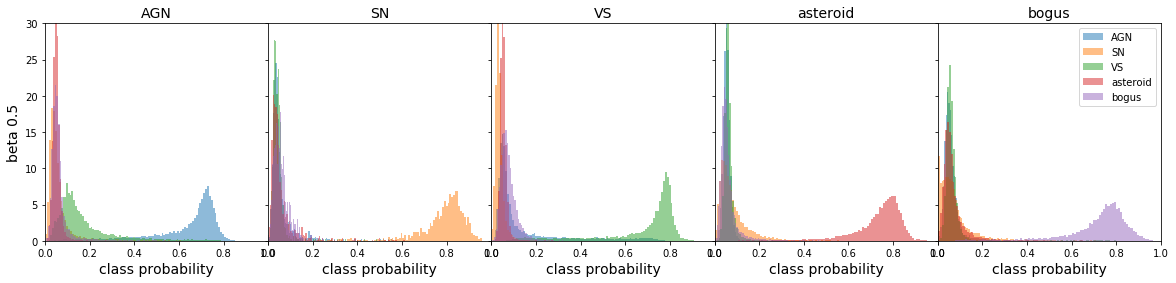

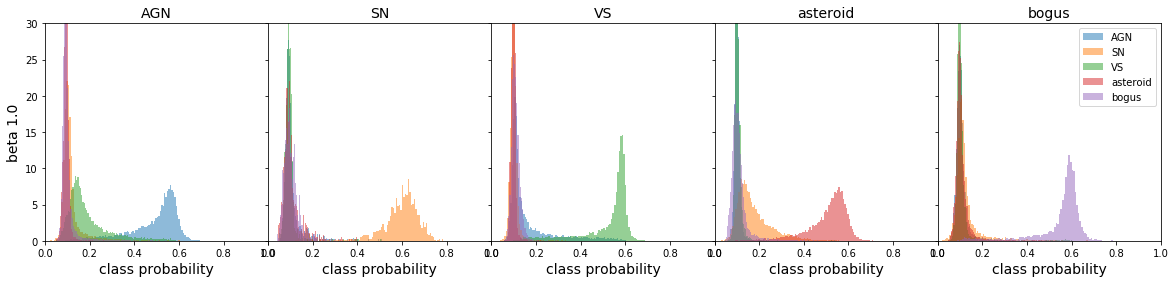

In [7]:
preds = []
for i, m in enumerate(models):
    model_pred = m.predict_proba(train_set.data_array)
    preds.append(model_pred)
    plot_confidence(
        train_set.data_label, model_pred, label_name, experiment=model_name[i], bins=100
    )

In [8]:
def confidence_grid(
    labels,
    models_probs,
    label_name,
    experiments,
    bins=10,
    fontsize=14,
    save_path=None,
    titles=None,
):
    classes = np.unique(labels)
    f, ax = plt.subplots(
        len(models_probs),
        len(classes),
        figsize=(20, 6),
        sharex=True,
        sharey=True,
        gridspec_kw={"hspace": 0, "wspace": 0},
    )
    for i, model_prob in enumerate(models_probs):
        experiment = experiments[i]
        for super_c in classes:
            for c in classes:
                class_index = np.where(labels == super_c)[0]
                probs_class_c = model_prob[class_index, c]
                ax[i][super_c].hist(
                    probs_class_c,
                    bins=bins,
                    label=label_name[c],
                    alpha=0.5,
                    density=True,
                )
            ax[i][super_c].set_xlim([0, 1])
            ax[i][super_c].set_ylim([0, 25])
            ax[i][super_c].set_xlabel("class probability", fontsize=fontsize)
            ax[i][super_c].set_xticks(np.arange(0.1, 1.0, step=0.2))
            ax[i][super_c].set_yticks(np.arange(0, 24, step=5))
            ax[i][super_c].tick_params(axis="both", labelsize=14)
            ax[0][super_c].set_title(titles[super_c], fontsize=fontsize)
        ax[i][0].set_ylabel(experiment, fontsize=fontsize)
        ax[0][len(classes) - 1].legend()
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

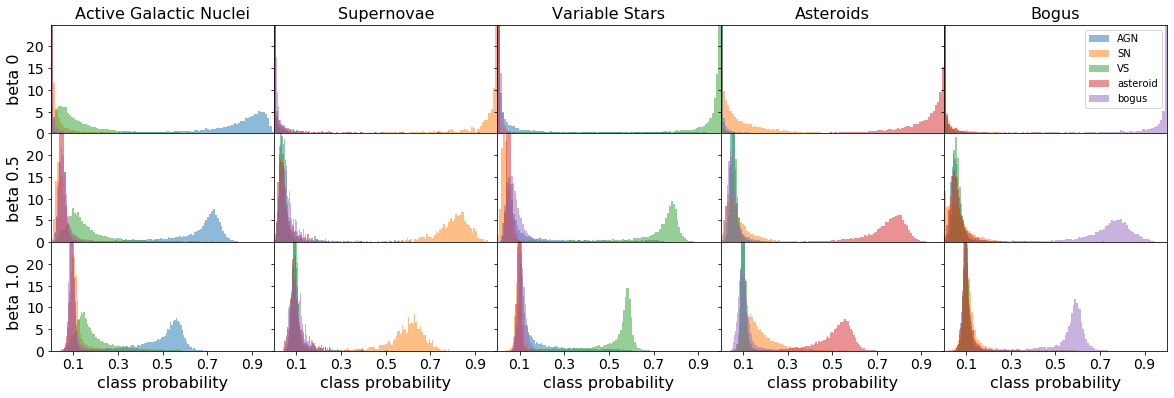

In [9]:
titles = [
    "Active Galactic Nuclei",
    "Supernovae",
    "Variable Stars",
    "Asteroids",
    "Bogus",
]
confidence_grid(
    train_set.data_label,
    preds,
    label_name,
    model_name,
    bins=100,
    save_path="plots/confidence_grid.pdf",
    titles=titles,
    fontsize=16,
)

## Checking order of probabilities. Confusion matrices considering the best two probabilities.

In [10]:
regular_model_pred = regular_model.predict_proba(test_set.data_array)
reg_model_pred = model_entropy_05.predict_proba(test_set.data_array)

In [11]:
def get_higher_n_pred(labels, prob_pred, n=2):
    new_pred = []
    for i, label in enumerate(labels):
        order_prob = np.argsort(prob_pred[i, :])
        if label in order_prob[-2:]:
            new_pred.append(label)
        else:
            new_pred.append(np.argmax(prob_pred[i, :]))

    return new_pred


regular_model_pred_2 = get_higher_n_pred(test_set.data_label, regular_model_pred)
entropy_model_pred_2 = get_higher_n_pred(test_set.data_label, reg_model_pred)

Normalized confusion matrix Acc 0.9840
[[1.   0.   0.   0.   0.  ]
 [0.   0.96 0.   0.02 0.02]
 [0.02 0.   0.98 0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.02 0.   0.   0.98]]
Normalized confusion matrix Acc 0.9840
[[1.   0.   0.   0.   0.  ]
 [0.   0.94 0.   0.04 0.02]
 [0.02 0.   0.98 0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]


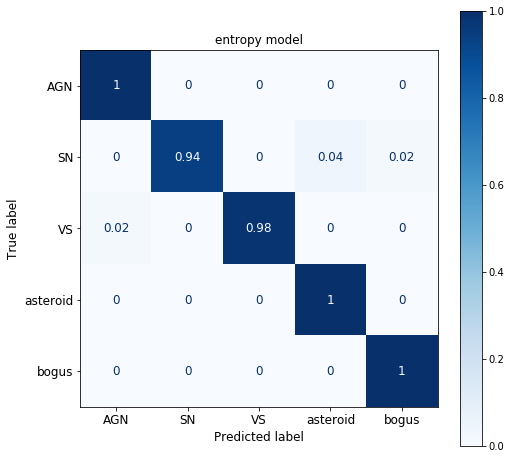

In [12]:
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
plot_confusion_matrix(
    test_set.data_label,
    regular_model_pred_2,
    title="regular model",
    classes=class_names,
    normalize=True,
)
plot_confusion_matrix(
    test_set.data_label,
    entropy_model_pred_2,
    title="entropy model",
    classes=class_names,
    normalize=True,
)

In [13]:
def plot_precision_recall_roc(
    model_probabilities, labels, plot_labels, n_th=500, fontsize=14, alpha=0.5
):
    """prob of being label 1 (Supernovae)"""

    f1, ax1 = plt.subplots(1, 1, figsize=(8, 8))
    f2, ax2 = plt.subplots(1, 1, figsize=(8, 8))

    for i, prob in enumerate(model_probabilities):

        plot_label = plot_labels[i]

        total_true = np.sum(labels == 1)
        total_false = np.sum(labels == 0)

        precision = []
        recall = []

        roc_x = []
        roc_y = []

        for th in np.linspace(start=0, stop=1, num=n_th):

            true_positive = np.sum(np.logical_and(prob >= th, labels == 1)) / np.sum(
                labels
            )
            true_negative = np.sum(np.logical_and(prob < th, labels == 0)) / np.sum(
                np.logical_not(labels)
            )
            false_positive = np.sum(np.logical_and(prob >= th, labels == 0)) / np.sum(
                np.logical_not(labels)
            )
            false_negative = np.sum(np.logical_and(prob < th, labels == 1)) / np.sum(
                labels
            )

            th_recall = true_positive / (true_positive + false_negative)
            th_precision = true_positive / (true_positive + false_positive)

            recall.append(th_recall)
            precision.append(th_precision)
            roc_x.append(false_positive)
            roc_y.append(true_positive)

        ax1.plot(roc_x, roc_y, label=plot_label, lw=3, alpha=alpha)
        ax2.plot(recall, precision, label=plot_label, lw=3, alpha=alpha)

    ax1.set_xlabel("False positive", fontsize=fontsize)
    ax1.set_ylabel("True positive", fontsize=fontsize)
    ax1.tick_params(axis="both", labelsize=14)
    # ax1.set_title("ROC curve", fontsize=fontsize)
    ax1.plot(
        np.linspace(start=0, stop=1, num=n_th),
        np.linspace(start=0, stop=1, num=n_th),
        "--",
    )
    ax1.legend(fontsize=fontsize - 2)

    f1.savefig("plots/roc.pdf", bbox_inches="tight")

    # ax2.set_title("Precision-Recall curve", fontsize=fontsize)
    ax2.set_xlabel("Recall", fontsize=fontsize)
    ax2.set_ylabel("Precision", fontsize=fontsize)
    ax2.tick_params(axis="both", labelsize=14)
    # ax2.plot(np.linspace(start=0, stop=1, num=n_th), np.linspace(start=0, stop=1, num=n_th), "--")
    ax2.legend(fontsize=fontsize - 2)

    f2.savefig("plots/precision_recall.pdf", bbox_inches="tight")

    plt.show()

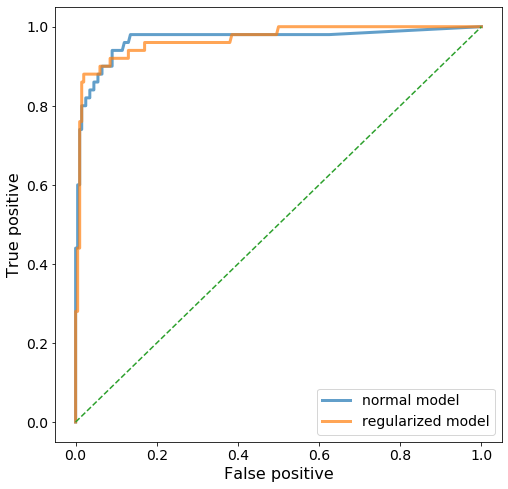

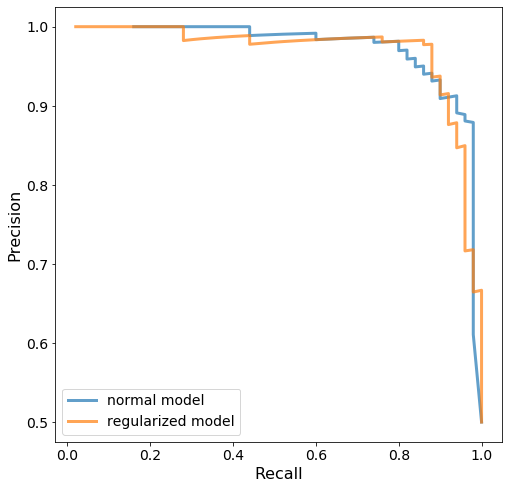

In [14]:
regular_model_sn_pred = regular_model_pred[:, 1]
entropy_model_sn_pred = reg_model_pred[:, 1]

sn_labels = test_set.data_label == 1

plot_precision_recall_roc(
    [regular_model_sn_pred, entropy_model_sn_pred],
    sn_labels,
    ["normal model", "regularized model"],
    alpha=0.7,
    n_th=2000,
    fontsize=16,
)

# Show prediction confidence when regularizing

In [15]:
def get_correct_predictions_idxs(model: DeepHiTSNanNormCropStampModel, images, labels):
    predicted_classes = model.predict(images)
    return np.where(predicted_classes == labels)[0]


def get_incorrect_predictions_idxs(
    model: DeepHiTSNanNormCropStampModel, images, labels
):
    predicted_classes = model.predict(images)
    return np.where(predicted_classes != labels)[0]

In [16]:
train_set, val_set, test_set = model_entropy._data_init()

NameError: name 'model_entropy' is not defined

In [17]:
def confidence_histogram(model, data_set, bins=50):
    labels = data_set.data_label
    images = data_set.data_array

    correct_idx = get_correct_predictions_idxs(model, images, labels)
    incorrect_idx = get_incorrect_predictions_idxs(model, images, labels)

    # print(labels)

    correct_pred = model.predict_proba(images[correct_idx])[
        np.arange(len(correct_idx)), labels[correct_idx]
    ]
    incorrect_pred = model.predict_proba(
        images[incorrect_idx]
    )  # [np.arange(len(incorrect_idx)),]
    incorrect_pred = incorrect_pred[
        np.arange(len(incorrect_idx)), np.argmax(incorrect_pred, axis=1)
    ]

    # print(correct_pred.shape)

    # print(incorrect_pred.shape)

    plt.figure(figsize=(12, 7))
    plt.hist(
        correct_pred,
        bins=bins,
        alpha=0.4,
        label="correct predictions",
        density=True,
        cumulative=True,
    )
    plt.hist(
        incorrect_pred,
        bins=bins,
        alpha=0.4,
        label="incorrect predictions",
        density=True,
        cumulative=True,
    )
    plt.legend()
    plt.show()

In [ ]:
confidence_histogram(model_best_so_far, train_set)
confidence_histogram(model_entropy, train_set)